# Descripció

Anem a practicar i a familiaritzar-nos amb algoritmes de classificació.
## Nivell 1


### Exercici 1

Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

### Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

### Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

### Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.


In [366]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sn
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [367]:
file="DelayedFlights.csv"
df = pd.read_csv(file,low_memory=False,index_col=0)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [368]:
df=df.sample(n=4000)

In [369]:
df['Delayed'] = df['ArrDelay'] > 0

In [370]:
df['Delayed'].value_counts()

True     3559
False     441
Name: Delayed, dtype: int64

In [371]:
df.drop(['Year','Month','DayofMonth','DayOfWeek','TailNum','Cancelled', 'CancellationCode', 'Diverted', 'UniqueCarrier', 'Origin', 'Dest','ArrDelay'], axis=1, inplace=True) 
#df.dropna(inplace=True) 
df['Delayed'].value_counts()

True     3559
False     441
Name: Delayed, dtype: int64

In [372]:
df['CarrierDelay'] = df['CarrierDelay'].fillna(0)
df['WeatherDelay'] = df['WeatherDelay'].fillna(0)
df['NASDelay'] = df['NASDelay'].fillna(0)
df['SecurityDelay'] = df['SecurityDelay'].fillna(0)
df['LateAircraftDelay'] = df['LateAircraftDelay'].fillna(0)
df.dropna(inplace=True) 
df['Delayed'].value_counts()

True     3559
False     420
Name: Delayed, dtype: int64

In [373]:
X=df #dataset
y=df['Delayed']

In [374]:
y.value_counts()

True     3559
False     420
Name: Delayed, dtype: int64

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [376]:
#Escalat de les dades
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [377]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Precisió arbre classificació  criteri gini:",metrics.accuracy_score(y_test, y_pred))

Precisió arbre classificació  criteri gini: 1.0


In [378]:
scores=cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print("Media de cross_validation", scores.mean())

Media de cross_validation 1.0


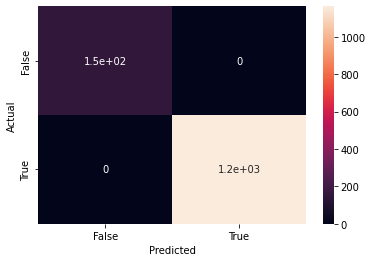

In [379]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [380]:
# Inicializar nosso classificador
gnb = GaussianNB()
# Treinar nosso classificador
model = gnb.fit(X_train, y_train)
# Fazer previsões
preds = gnb.predict(X_test)

score = model.score(X_train,y_train)
print("Metrica del modelo", score)
 
scores=cross_val_score(model, X, y, cv=5, scoring='f1_macro')
print("Media de cross_validation", scores.mean())


Metrica del modelo 1.0
Media de cross_validation 1.0


In [381]:
preds

array([ True,  True,  True, ...,  True,  True,  True])

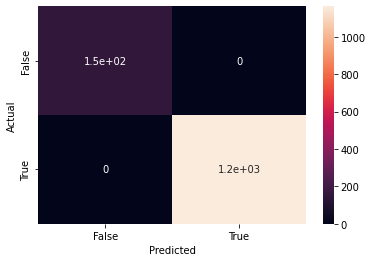

In [382]:
confusion_matrix = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [383]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

score = knn_classifier.score(X_train,y_train)
print("Metrica del modelo", score)
 
scores=cross_val_score(knn_classifier, X, y, cv=5, scoring='f1_macro')
print("Media de cross_validation", scores.mean())




Metrica del modelo 0.999624765478424
Media de cross_validation 0.4902174131591317


In [394]:
y_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [393]:
y_train.shape

(2984,)

In [389]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

ValueError: Length of values (1314) does not match length of index (995)

In [384]:
# padronizacao dos valores
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [385]:
# importing necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
 

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
 
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)


score = svm_model_linear.score(X_train,y_train)
print("Metrica del modelo", score)
 
scores=cross_val_score(svm_model_linear, X, y, cv=5, scoring='f1_macro')
print("Media de cross_validation", scores.mean())


Metrica del modelo 1.0
Media de cross_validation 0.9973589023452748



## Nivell 2

### Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció


In [386]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

 
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)

 
# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
print(cm)

[[  2  99]
 [  5 889]]


In [387]:
## define hyperparameters combinations to try
param_dic = {
'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model
'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model
'max_depth':[2,3,4,5,6,7],    #maximum depth of the tree
'min_samples_split':[2,4,6,8,10,20,40,60,100],    #sets the minimum number of samples to split
'min_samples_leaf':[1,3,5,7,9],     #the minimum number of samples to form a leaf
'max_features':[2,3,4,5,6,7],     #square root of features is usually a good starting point
'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]} 

In [388]:
## random search
random_search = model_selection.RandomizedSearchCV(model, 
       param_distributions=param_dic, n_iter=1000, 
       scoring="accuracy").fit(X_train, y_train)


ValueError: Invalid parameter subsample for estimator GaussianNB(). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_

## Nivell 3


### Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions